In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import os

In [2]:

for dirname, _, filenames in os.walk(''):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
dados = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2019-08-12.csv',',').dropna()
dados

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
3997692,1565567760,11555.57,11555.57,11540.37,11540.58,0.036868,425.909106,11552.336234
3997693,1565567820,11553.49,11556.22,11553.49,11556.22,0.623462,7204.428272,11555.520505
3997694,1565567880,11559.73,11561.22,11546.77,11561.22,0.159070,1838.731403,11559.252199
3997695,1565567940,11559.73,11589.73,11528.73,11528.73,16.198210,187504.635170,11575.638889


In [4]:
# Attempt at using multiple columns (Scrapped as data doesn't correlate at all)
# x = np.array([dados['Open'], dados['High'], dados['Low'], dados['Close']])
# x = x[:, np.newaxis]
# x = x.reshape(x.shape[2], x.shape[1], x.shape[0])
# x = x[:,:,2]
# y = dados['Weighted_Price']
# [x.shape, y.shape]

x = dados[['Timestamp']]
y = dados['Weighted_Price']

In [5]:
x_train, x_test, y_train, y_test=train_test_split(x, y)
[x_train, x_test, y_train, y_test]

[          Timestamp
 3531628  1537603920
 3761891  1551419700
 930829   1381167660
 798954   1373255160
 3283225  1522699740
 ...             ...
 1583856  1420349280
 1498101  1415203980
 3177610  1516362840
 910174   1379928360
 1677120  1426333440
 
 [2074364 rows x 1 columns],
           Timestamp
 3365370  1527628440
 2093385  1451309340
 1366263  1407293700
 3859487  1557275460
 1989620  1445083440
 ...             ...
 2140094  1454111880
 3163079  1515490980
 573991   1359757380
 2317536  1464758400
 2444967  1472404260
 
 [691455 rows x 1 columns],
 3531628     6700.251000
 3761891     3801.910000
 930829       123.440542
 798954        73.027348
 3283225     6979.984827
                ...     
 1583856      282.020000
 1498101      341.304114
 3177610    11820.307006
 910174       123.357672
 1677120      284.287825
 Name: Weighted_Price, Length: 2074364, dtype: float64,
 3365370     7494.887891
 2093385      423.760000
 1366263      584.920000
 3859487     5756.995462
 198

In [7]:
modelo=linear_model.LinearRegression()
modelo.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
print('Fórmula (a * x + b): {} * x + {}'.format(modelo.coef_[0], modelo.intercept_))
print('Qualidade: {}'.format(modelo.score(x_test,y_test)))
print('Desvio padrão: {}'.format(np.sqrt(np.mean((modelo.predict(x_test)-y_test)**2))))

Fórmula (a * x + b): 4.495374145759788e-05 * x + -62987.902297012624
Qualidade: 0.529369621729887
Desvio padrão: 2570.2374480929066


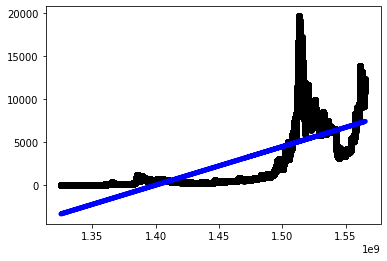

In [9]:
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, modelo.predict(x_test), color='blue',linewidth=5)

In [10]:
w_test = np.array([[1325317920], [1325391360], [1385775000], [1393639980], [1407332460], [1412097660], [1439094960], [1511926260], [1523958420], [1565568000]])
#                   first input   1224th        1007618th     1138701th     1366909th     1446329th     1889812th     3103667th     3304203th     last input
y_pred = modelo.predict(w_test)
y_pred # ideal would be 4.390000, 4.580000, 1137.000000, 550.481835, 577.350000, 381.058418, 261.864553, 10196.695773, 8148.332643, 11540.450291

array([-3409.90317221, -3406.60176944,  -692.13122861,  -338.57095112,
         276.95725471,   491.17082351,  1704.80046776,  4978.83989798,
        5519.7305078 ,  7390.23680928])